In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/returns_svi_edgar.csv')
df = df[['symbol', 'date', 'svi.1', 'edgar', 'price', 'volume', 'WeeklyReturns']]
df.rename({'svi.1':'svi'})
df.head()

,symbol,date,svi.1,edgar,price,volume,WeeklyReturns
0,MSFT,2005-01-02,31338,145,26.67,398924026.0,NaN
1,MSFT,2005-01-09,33079,3220,26.12,379712121.0,-2.062242
2,MSFT,2005-01-16,20892,3030,25.65,266617523.0,-1.799387
3,MSFT,2005-01-23,34820,3539,26.18,409844550.0,2.066277
4,MSFT,2005-01-30,26115,4112,26.32,347830186.0,0.534759


In [26]:
window_size = 4  # Number of periods for the SMA
df['sma_4'] = df['WeeklyReturns'].rolling(window=window_size).mean()

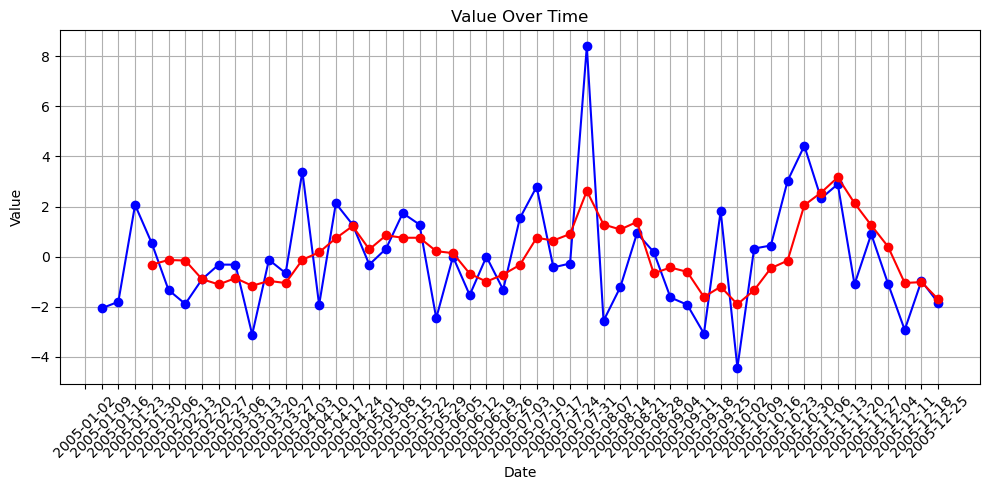

In [27]:
df_plot = df.loc[(df['symbol'] == 'MSFT')][0:52]
# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(df_plot['date'], df_plot['WeeklyReturns'], marker='o', linestyle='-', color='blue')  # Plot the data
plt.plot(df_plot['date'], df_plot['sma_4'], marker='o', linestyle='-', color='red')  # Plot the data
plt.title('Value Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Value')  # Y-axis label
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels

# Show the plot
plt.show()

In [32]:
def lagger(df, col,num):
    df[col +f' shifted-({num})']  = df[col].shift(num)
    return df

df = lagger(df, 'sma_4', -1)
df.head(10)

,symbol,date,svi.1,edgar,price,volume,WeeklyReturns,sma_3,sma_4,sma_4shifted-1,sma_4shifted-(-1),sma_4 shifted-(-1)
0,MSFT,2005-01-02,31338,145,26.67,398924026.0,NaN,NaN,NaN,NaN,NaN,NaN
1,MSFT,2005-01-09,33079,3220,26.12,379712121.0,-2.062242,NaN,NaN,NaN,NaN,NaN
2,MSFT,2005-01-16,20892,3030,25.65,266617523.0,-1.799387,NaN,NaN,NaN,NaN,NaN
3,MSFT,2005-01-23,34820,3539,26.18,409844550.0,2.066277,-0.598451,NaN,NaN,-0.315148,-0.315148
4,MSFT,2005-01-30,26115,4112,26.32,347830186.0,0.534759,0.267216,-0.315148,NaN,-0.132035,-0.132035
5,MSFT,2005-02-06,27856,3502,25.97,360145305.0,-1.329787,0.423750,-0.132035,-0.315148,-0.153886,-0.153886
6,MSFT,2005-02-13,34820,9272,25.48,348529709.0,-1.886792,-0.893940,-0.153886,-0.132035,-0.896122,-0.896122
7,MSFT,2005-02-20,27856,4104,25.25,329158361.0,-0.902669,-1.373083,-0.896122,-0.153886,-1.109020,-1.109020
8,MSFT,2005-02-27,29597,4775,25.17,322997251.0,-0.316832,-1.035431,-1.109020,-0.896122,-0.856033,-0.856033
9,MSFT,2005-03-06,26115,4304,25.09,318787290.0,-0.317839,-0.512446,-0.856033,-1.109020,-1.161537,-1.161537


In [ ]:
def min_max_scale_column(df, column_name):
    # Calculate the minimum and maximum of the column
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    
    # Apply Min-Max scaling
    df[column_name + '_min_max_scaled'] = (df[column_name] - min_value) / (max_value - min_value)
    
    return df

min_max_scale_column(df, )

In [19]:
ms = df.loc[df['symbol'] == 'MSFT']


In [20]:
ms.loc[ms['edgar'] == 0]

,symbol,date,svi.1,edgar,price,volume,WeeklyReturns,sma_3
42,MSFT,2005-10-23,109683,0,25.53000,324215008.0,3.026634,1.265952
43,MSFT,2005-10-30,116647,0,26.66000,362185164.0,4.426165,2.632895
60,MSFT,2006-02-26,76604,0,26.93000,258851644.0,1.126549,0.300615
62,MSFT,2006-03-12,81827,0,27.50000,332435906.0,1.214575,1.077441
65,MSFT,2006-04-02,78345,0,27.25000,244238964.0,0.147005,-0.298116
...,...,...,...,...,...,...,...,...
798,MSFT,2020-04-19,116325,0,174.55000,194401867.0,-2.267643,4.411765
799,MSFT,2020-04-26,180675,0,174.57001,212798330.0,0.011464,1.964829
800,MSFT,2020-05-03,118800,0,184.67999,158439367.0,5.791361,1.178394
801,MSFT,2020-05-10,99000,0,183.16000,195844327.0,-0.823040,1.659928
